# 00_What to Expect from this Book?

Welcome to our recipe book! 
This chapter will give you a quick overlook about what you can expect to learn from this book. 

The goal of this is, to provide you with a "recipe" of how to work with climate data in a scientific programming way. We will get you there step by step, each chapter of the book building upon those before. Anyway, if you are already familiar with some of the basic tools we use here and search for a specific thing or plot you want to learn, just jump into any of the chapters directly! 

So if you want to learn, how to work with climate data in python and produce plots out of it, here you go! The following chapters will show you everything that is important, to handle climate data in a scientific programming way. To see some of the possible output plots directly, scroll down a bit!

Those are the most important steps to achieve the goal:

* **First**, you will lern how to generally use **python** as a programming language and how to cope with some specific forms of python, such as a jupyter-notebook. 

* **Second**, this book will show, you how to download ERA-Interim data from the ECMWF server. This is the kind of climatological data, we will use for the rest of the chapters. Here are some important things to know about climate data:
### The Data

  ERA55 is a global atmospheric reanalysis currently available from 1979 until now. The spatial resolution of the data set is approximately 30 km on 137 vertical levels from the surface up to a height 80km. It should be available starting from 1950 in 2020.
  
  So what is a reanalysis? A climate reanalysis gives a numerical description of the recent climate, produced by combining models with observations. How do they combine models and observations? This process is called [data assimilation](https://www.ecmwf.int/assets/elearning/da/da1/story_html5.html): We assume, that neither the model, nor the observations are perfect. Hence, we get a model forecast output and new observations and we try to combine them in a way, that the result is our "best guess" for the real state of the atmosphere. Therefore its deviation from the model forecast as well as from the observations will be minimal! 
  
  In our case, the ouput (reanalysis) contains estimates of atmospheric parameters such as air temperature or pressure, and surface parameters such as precipitation, soil moisture content, and sea-surface temperature. The estimates are produced for all locations on earth, and they span a long time period that can extend back by decades or more. Climate reanalyses generate large datasets that can take up several petabytes of space. This means, ECMWF periodically uses its forecast models and data assimilation systems to 'reanalyse' archived observations, creating global data sets describing the recent history of the atmosphere, land surface and oceans. An important requirement for reanalysis is that it uses a single model version and data assimilation method, in order to produce a consistent data set for the full reanalysis period.
  
  ### Storing the Data
  
  The ERA5 data is stored in **NetCDF** (Network Common Data Format) files. This is a very common format for storing scientific, mulit-dimensional data. The following will give you a quick idea of what a NetCFD File is and why it is very useful for us: 

  The netCDF-Files consist of a set of 2-dimensional rasterfiles: For each timestep and for each height, there is a rasterfile that contains the value of a single variable (e.g. temperature, wind or humidity) for each rastercell. Each rastercell specifies a certain longitude-latitude area on our globe. 
  
  
 

![4D-Data: Data of a specific area dependent on height z and time](3D_netCDF.gif "")

   **3D-Data in a netCDF-File**: Data of a specific area dependent over time

![](netCDF.gif "")

**4D-Data in a netCDF-File**: Data of a specific area dependent on height z and time


  ### The Data in a Python Format

NetCDF files are binary files, which means that you can't just open them in a text editor. You need a special reader for it. Python has a special tool to do this: it is called xarray.

The main difference between a raw array and a xarray is, that in xarrays your coordinate axes are labeled: Instead of being e.g. x1, x2, x3,... your axes might have the names latitude, longitude and height. This means, that you will be able to adress your dataset in a much more convenient and intuitive way! 
Let's have a quick look on what such a netCDF file opened with xarray look like. Therefore, we use some python code in so called "code cells", that you will see underneath. Don't worry about what you see right know. It will become more clear, as we move on.

In [15]:
#This is some python code required to make everything work properly. 
# We are not interested in this right now!
%matplotlib inline
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 6)  # Default plot size
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are to ignore certain warnings.
import warnings
warnings.filterwarnings('ignore')

This is what is important now!

In [16]:
ds = xr.open_dataset('./data/ERA5-LowRes-MonthlyAvg-t2m_tp.nc') #we read the netCDF file (ERA5_2mt_prcp.nc)
print(ds) #let's see what we have read here

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 480)
Coordinates:
  * longitude  (longitude) float32 -179.625 -178.875 ... 178.875 179.625
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-26 14:52:06 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...


As expected, we see the labeled coordinate axes of the dataset! Those are here: latitude, longitude and time. Furthermore we can see, which variables we are dealing with: in this case it is the 2 meter temperature (t2m) and the total precipitation (tp). So on the whole we have data of the 2m temperature and total precipitation with values all around our globe (laitude and longitude coordinates) and from 1979 to 2014 (time coordinate). 

Once we have read such datasets in python with xarray, we can now select special areas or timesteps that we are interested in. In other words, we will next learn how to work with xarrays and how to do some different types of analysis with them.

* **All the rest** of this book will be about producing **plots** out of the xarray datasets. The plots, that we will be able to produce together with the NetCDF files and python could look like this one, for example!

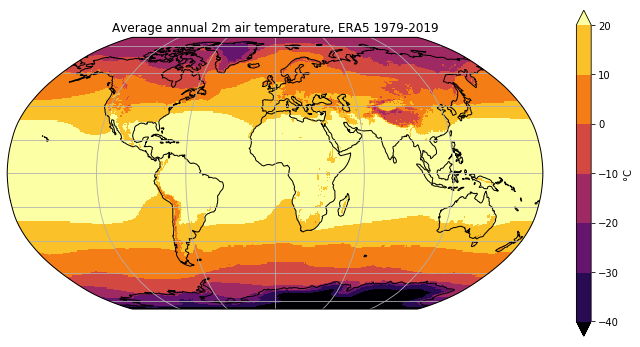

In [17]:
t2_tavg = ds.t2m.mean(dim='time')
t2c_tavg = t2_tavg - 273.15
ax = plt.axes(projection=ccrs.Robinson())
t2c_tavg.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='inferno', center=False, 
              vmin=-40, vmax=20, levels=7, cbar_kwargs={'label':'°C'}) 
ax.set_title('Average annual 2m air temperature, ERA5 1979-2019')
ax.coastlines(); ax.gridlines(); 

We will learn how to give our map differerent colour schemes, projections, leveling and much more. There will also be a lot of different plots, such as 1-dimensional or 2-dimensional ones, map extracts, streamline plots,...

We can also plot mean precipitation on a map:

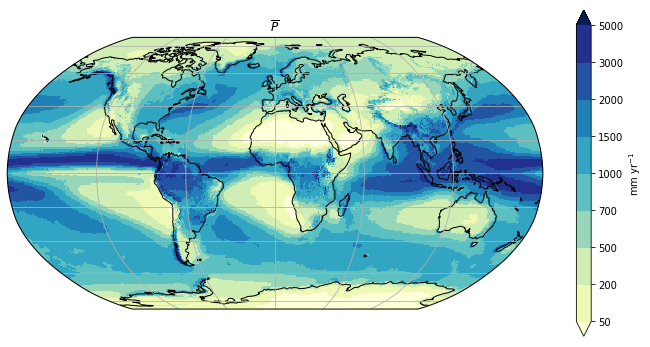

In [18]:
annual_prcp = ds.tp.mean(dim='time')*365.25*1000
ax = plt.axes(projection=ccrs.Robinson())
annual_prcp.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'mm yr$^{-1}$'}, 
                 levels=[50, 200, 500, 700, 1000, 1500, 2000, 3000, 5000], cmap='YlGnBu') 
ax.set_title('$\overline{P}$')
ax.coastlines(); ax.gridlines();  

Let's produce a streamline plot of our 10m windfield of an average month january!

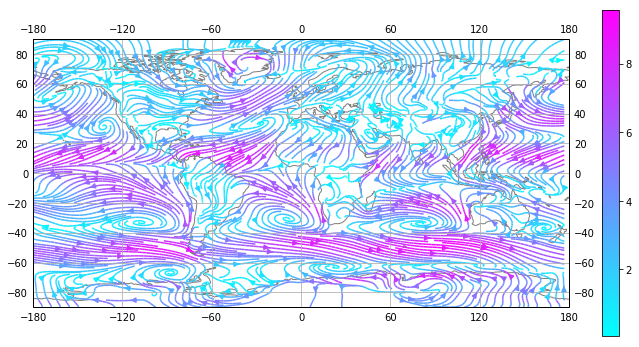

In [19]:
ds = xr.open_dataset('./data/ERA-Int-MonthlyAvg-UVSLP.nc')
u = ds.u10.sel(month=1).load()
v = ds.v10.sel(month=1).load()
ws = (u**2 + v**2)**0.5
ax = plt.axes(projection=ccrs.PlateCarree())
strm = ax.streamplot(u.longitude, u.latitude, u.values, v.values, transform=ccrs.PlateCarree(),
                     density=4, color=ws.values, cmap=plt.get_cmap('cool'))
plt.colorbar(strm.lines)
ax.coastlines(color='grey'); ax.gridlines(draw_labels=True);  # what is this line doing?

And we can even select a certain area, e.g. the african horn:

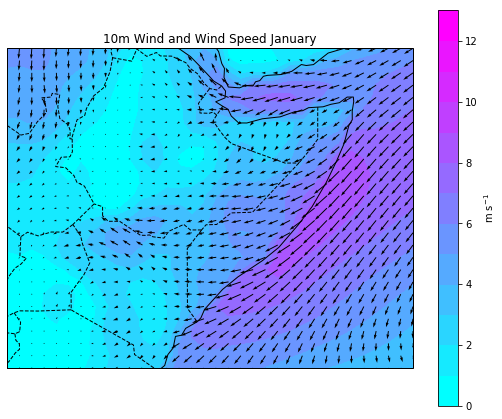

In [20]:
u_jf = u.sel(longitude=slice(30, 55), latitude=slice(15, -5))
v_jf = v.sel(longitude=slice(30, 55), latitude=slice(15, -5))
 
ws_jf = (u_jf**2 + v_jf**2)**0.5
figur = plt.figure(figsize=(20, 16))
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ws_jf.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'m s$^{-1}$'},
                 vmax=14, cmap = 'cool', levels = range(0,14))
qv1 = ax.quiver(u_jf.longitude, u_jf.latitude, u_jf, v_jf, transform=ccrs.PlateCarree())
ax.coastlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
ax.set_title('10m Wind and Wind Speed January');

Once you worked your way through this book, you will be able to produce all of those plots on your own. And it gets even better: If you only need one specific plot, you can more or less directly jump to those chapters of the book and learn how to go for it! 

This should be enough motivation for us, to keep on going and learn everything we need to produce such nice outputs!